1. Linear regression in JAX

w=Array([[1.0040143]], dtype=float32), b=Array([[-2.4424558]], dtype=float32)
16.348314


  0%|          | 0/200 [00:00<?, ?it/s]

100%|██████████| 200/200 [00:00<00:00, 263.58it/s]


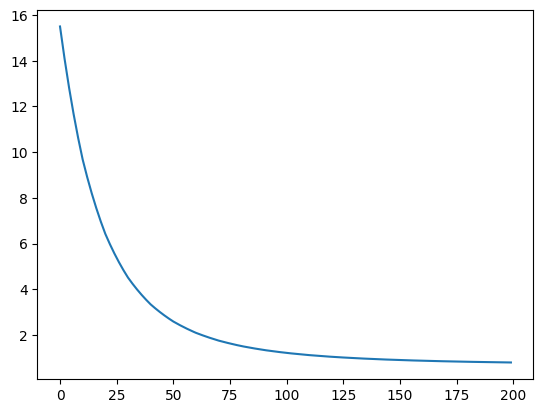

After training: params=[Array([[2.1181931]], dtype=float32), Array([[0.36589012]], dtype=float32)]
0.79261744
loss(params, new_x, new_y)=Array(0.78215766, dtype=float32)


In [52]:
import jax
import jax.numpy as jnp
import tqdm
import matplotlib.pyplot as plt

# generate synthetic data

def get_synthetic_data(key, n_samples=100):
    x = jax.random.uniform(key, shape=(n_samples,1))
    y = 2 * x + 1 + jax.random.normal(key, (n_samples,1)) * 0.01
    return x, y

def init_network_params(input_dim, output_dim, key):
    key_w, key_b = jax.random.split(key)
    w = jax.random.normal(key_w, (input_dim, output_dim))
    b = jax.random.normal(key_b, (output_dim, 1))
    return w, b

def predict(params, inputs):
    w, b = params
    return jnp.dot(inputs, w) + b

def loss(params, inputs, targets):
    predictions = predict(params, inputs)
    return jnp.mean((predictions - targets) ** 2) + 0.1 * jnp.sum(params[0] ** 2) + 0.1 * jnp.sum(params[1] ** 2)

@jax.jit
def update(params, inputs, targets, learning_rate) -> list[jnp.ndarray]:
    grads = jax.grad(loss)(params, inputs, targets)
    return [(p - g * learning_rate) for p, g in zip(params, grads)]

def train(params, inputs, targets, learning_rate, num_epochs):
    loss_history = []
    for epoch in tqdm.tqdm(range(num_epochs)):
        params = update(params, inputs, targets, learning_rate)
        loss_history.append(loss(params, inputs, targets))
        if epoch % 10 == 0:
            learning_rate *= 0.9
        # print(f"Loss: {loss_history[-1]}")
    return params, loss_history


key = jax.random.PRNGKey(0)
inputs, targets = get_synthetic_data(key, n_samples=500)
w, b = init_network_params(1, 1, key)

print(f"{w=}, {b=}")
print(loss(params=(w, b), inputs=inputs, targets=targets))


learning_rate = 0.01
num_epochs = 200

predict_one = predict(params=(w, b), inputs=inputs)

params = (w, b)
params, loss_history = train(params, inputs, targets, learning_rate, num_epochs)

plt.plot(loss_history)
plt.show()

print(f"After training: {params=}")

print(loss_history[-1])
new_data_key = jax.random.PRNGKey(1)
new_x, new_y = get_synthetic_data(new_data_key, n_samples=10)

print(f"{loss(params, new_x, new_y)=}")





In [28]:
print(f"{jax.grad(loss)=}")

jax.grad(loss)=<function loss at 0x7e0484772840>
